In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm

from fdtd_solver import FDTDSolver
from RF_index import RFIndex

In [2]:
class SESimulation:
    def __init__(self, layer_materials, layer_thicknesses, solver):

        self.layer_materials = layer_materials
        self.layer_thicknesses = layer_thicknesses
        self.fdtd_solver = solver

        # Define frequency vectors for simulation
        self.f_vector = np.linspace(8e9, 18e9, 100)

    def perform_stackrt_simulation(self, n_matrix, f_vector):
        return self.fdtd_solver.stackrt(n_matrix, self.layer_thicknesses, f_vector, 0)

    def calculate_SE(self, RT):
        Ts = RT['Ts']
        Tp = RT['Tp']
        SE_Ts = -10 * np.log10(Ts)
        SE_Tp = -10 * np.log10(Tp)
        
        SE_Ts_mean = np.mean(SE_Ts)
        SE_Tp_mean = np.mean(SE_Tp)

        SE = (SE_Tp_mean + SE_Ts_mean) / 2
        return SE

    def run_simulation(self):
        # Create refractive index matrix
        n_matrix = RFIndex.create_matrix(self.fdtd_solver, self.layer_materials, self.f_vector)

        # Perform stackrt simulation
        RT = self.perform_stackrt_simulation(n_matrix, self.f_vector)

        # Calculate Spectral Efficiency (SE)
        SE = self.calculate_SE(RT)

        # Output results
        # print(f'stackrt: SE {SE:.4f}')
        return SE

In [3]:
solver = FDTDSolver()

In [4]:
material_database = {
    0: "Air",
    1: "TiO2 (Titanium Dioxide) - Siefke",
    2: "SiO2 (Glass) - Palik",
    3: "Cr (Chromium) - CRC",
    4: "Cr (Chromium) - Palik"
}

material_limits = {
    0: 0.0,
    1: 24e-9,
    2: 141e-9,
    3: 153e-9,
    4: 164e-9
}


def random_value(layer_code):
    layer_materials = []
    layer_thicknesses = []

    for code in layer_code:
        layer_materials.append(material_database[code])
        layer_thicknesses.append(rd.random() * material_limits[code])

    layer_thicknesses = np.array(layer_thicknesses)

    simulation = SESimulation(layer_materials, layer_thicknesses, solver)
    SE = simulation.run_simulation()
    
    return SE

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:04<00:00, 154.83it/s]


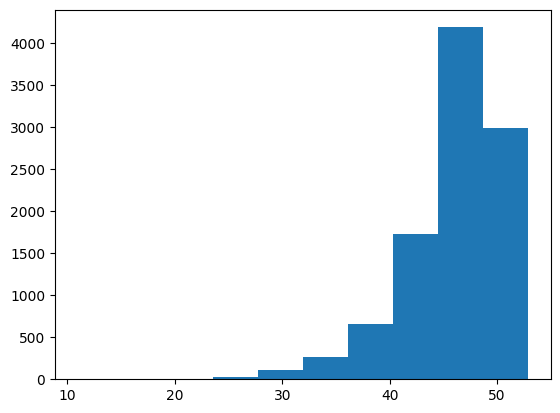

In [6]:
layer_code = [0, 1, 2, 3, 4, 3, 2, 0]

N = 10000
SEs = []

for i in tqdm(range(N)):
    SEs.append(random_value(layer_code))
    
plt.hist(SEs)
plt.show()